In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [6]:
# Loading the dataset
Ocean_df = pd.read_csv('bottle.csv')

C:\Users\olatu\AppData\Local\Temp\ipykernel_18972\3803299710.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  Ocean_df = pd.read_csv('bottle.csv')


In [7]:
# Getting the dimensions of the dataset
Ocean_df.shape

(864863, 74)

In [8]:
# Return the description of the data in the DataFrame
Ocean_df.describe

<bound method NDFrame.describe of         Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0             1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1             1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2             1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3             1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4             1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   
...         ...      ...          ...                                     ...   
864858    34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0000A-7   
864859    34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0002A-3   
864860    34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0005A-3   
864861    34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0010A-3   
864862    34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0015A

In [9]:
# Creating dataframe for the two columns that will be used
Ocean = Ocean_df[['T_degC','Salnty']]

In [10]:
Ocean.shape

(864863, 2)

In [11]:
# Checking for missing values per column
Ocean.isnull().sum(axis=0)

T_degC    10963
Salnty    47354
dtype: int64

In [12]:
# Detecting the various formats that can be represented as missing values
missing_values = ["n/a", "na", "--"]

In [13]:
# Getting rid of missing values from dataframe
Oceans = pd.read_csv("bottle.csv", na_values = missing_values)

C:\Users\olatu\AppData\Local\Temp\ipykernel_18972\3182944354.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  Oceans = pd.read_csv("bottle.csv", na_values = missing_values)


In [14]:
OceanDF = Oceans[['T_degC','Salnty']]

In [15]:
# Calculate the sum of elements in each column
OceanDF.isnull().sum(axis=0)

T_degC    10963
Salnty    47354
dtype: int64

count    853900.000000
mean         10.799677
std           4.243825
min           1.440000
25%           7.680000
50%          10.060000
75%          13.880000
max          31.140000
Name: T_degC, dtype: float64


C:\Users\olatu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


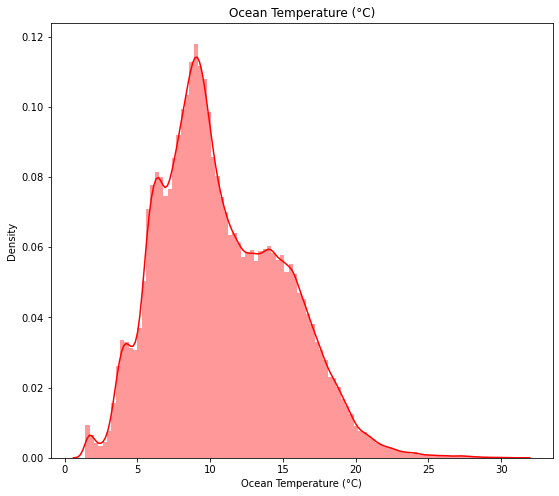

In [16]:
# Description of the column temperature

print(OceanDF["T_degC"].describe())
plt.figure(figsize=(9, 8))
sns.distplot(OceanDF["T_degC"], color='r', bins=100, hist_kws={'alpha': 0.4}).set(xlabel='Ocean Temperature (°C)',title='Ocean Temperature (°C)');

count    817509.000000
mean         33.840350
std           0.461843
min          28.431000
25%          33.488000
50%          33.863000
75%          34.196900
max          37.034000
Name: Salnty, dtype: float64


C:\Users\olatu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


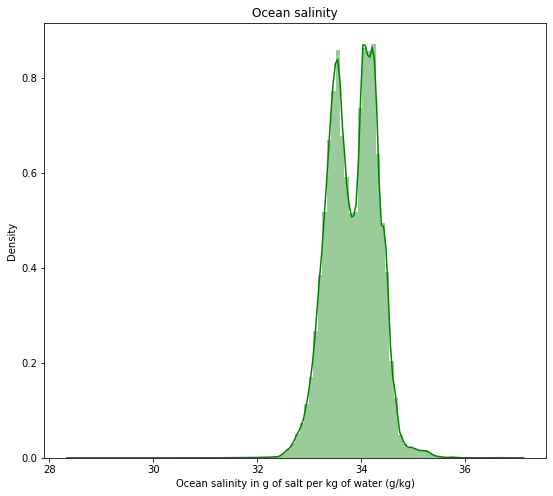

In [17]:
# Description of the column salinity
print(OceanDF["Salnty"].describe())
plt.figure(figsize=(9, 8))
sns.distplot(OceanDF["Salnty"], color='g', bins=100, hist_kws={'alpha': 0.4}).set(xlabel='Ocean salinity in g of salt per kg of water (g/kg)',title='Ocean salinity');


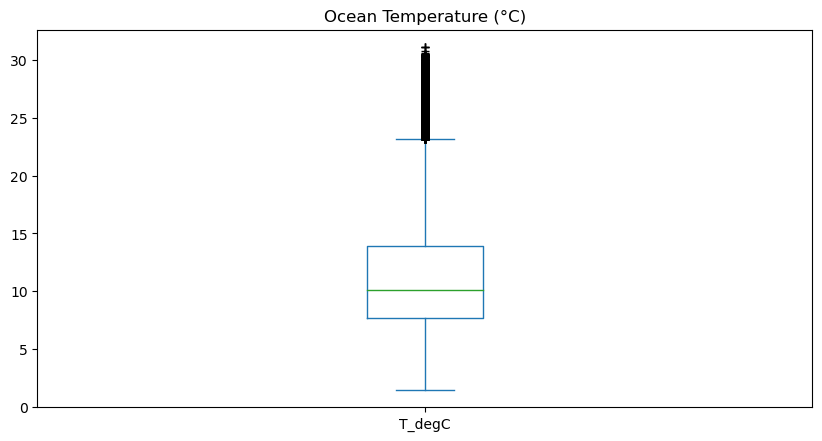

In [18]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
# plot boxplot
OceanDF["T_degC"].plot.box(sym='+')
plt.title('Ocean Temperature (°C)');

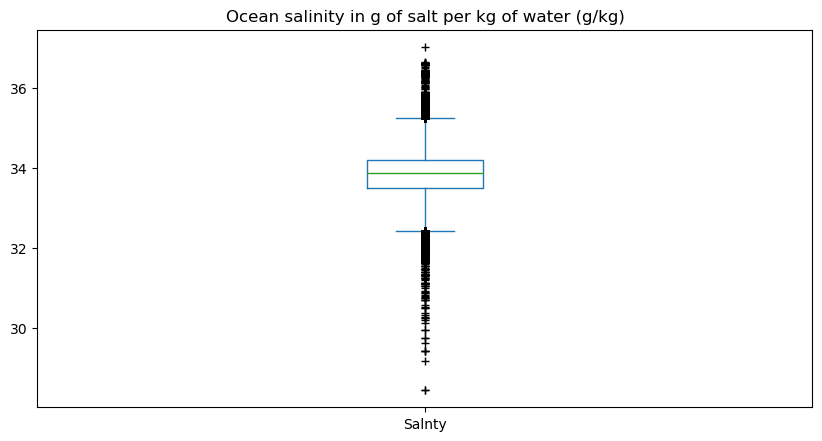

In [19]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
# plot boxplot
OceanDF["Salnty"].plot.box(sym='+')
plt.title('Ocean salinity in g of salt per kg of water (g/kg)');


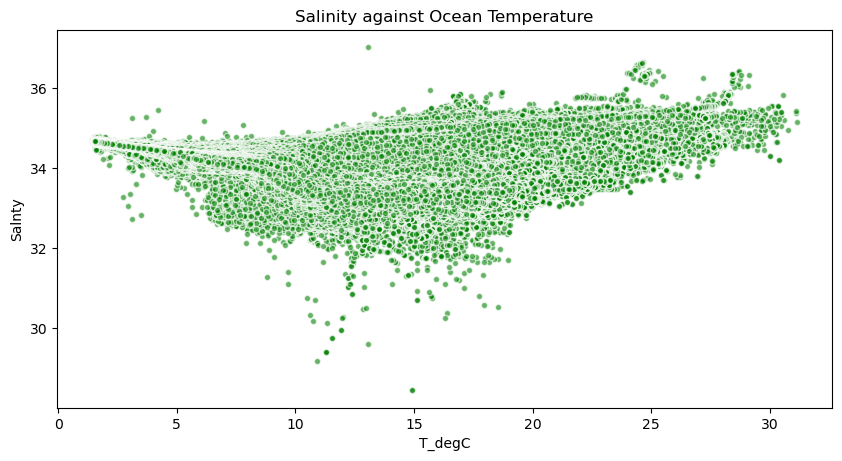

In [20]:
# Scatter plot for Ocean salinity against temperature
OceanDF.plot.scatter(x="T_degC", y="Salnty",color='green',alpha=0.6,edgecolors="white",linewidth=1)
plt.title('Salinity against Ocean Temperature')
plt.show()

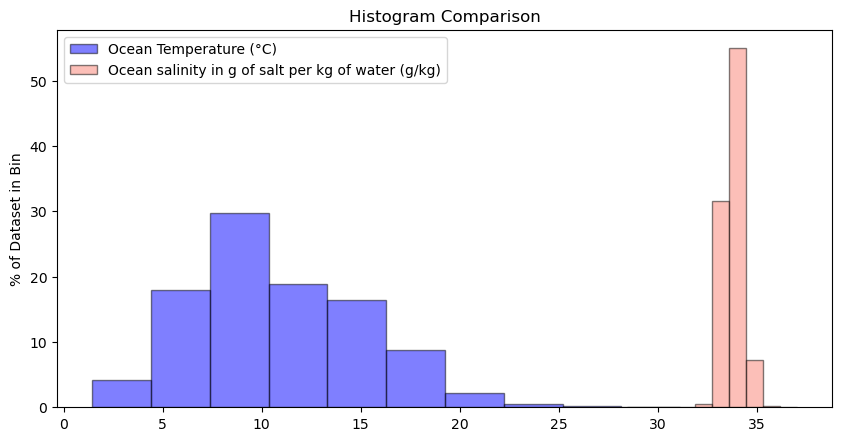

In [21]:
# Histogram comparison for Ocean temperature and salinity
xweights = 100 * np.ones_like(OceanDF["T_degC"]) / OceanDF["T_degC"].size
yweights = 100 * np.ones_like(OceanDF["Salnty"]) /OceanDF["Salnty"].size

fig, ax = plt.subplots()
ax.hist(OceanDF["T_degC"], weights=xweights,label= 'Ocean Temperature (°C)', color='blue', alpha=0.5, edgecolor='black')
ax.hist(OceanDF["Salnty"], weights=yweights,label='Ocean salinity in g of salt per kg of water (g/kg)', color='salmon', alpha=0.5, edgecolor='black')

ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.legend()
plt.show()

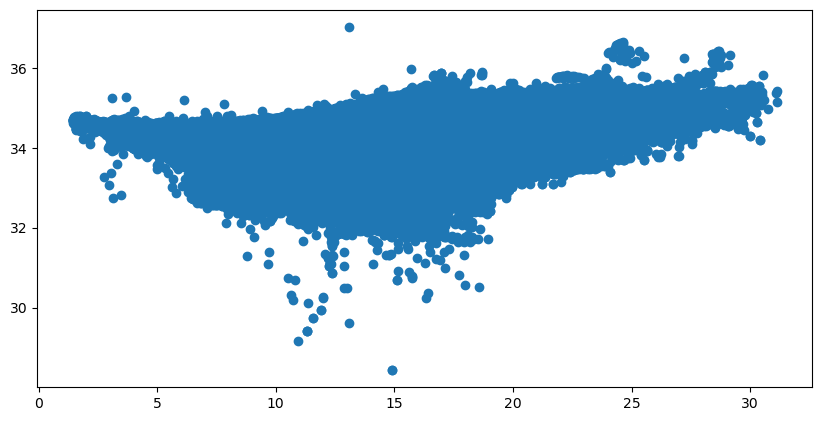

In [22]:
Salinity = OceanDF["Salnty"].values[0:800000]
Temperature = OceanDF["T_degC"].values[0:800000]
plt.scatter(Temperature,Salinity)
plt.show()

In [23]:
Sal_vector = Salinity.reshape(-1,1)

In [28]:
model = LinearRegression().fit(Sal_vector, Temperature)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
prediction = model.predict(depth_vector)

NameError: name 'model' is not defined

NameError: name 'prediction' is not defined

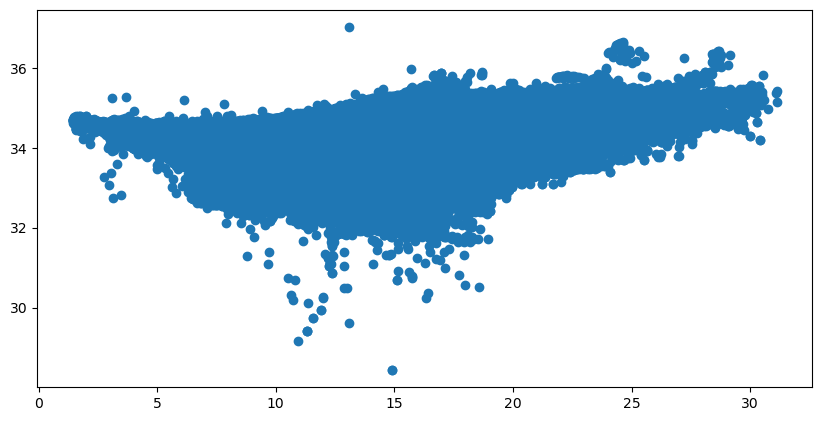

In [27]:
plt.scatter(Temperature,Salinity)
plt.plot(Salinity, prediction, color="red")
plt.title('Salinity against Ocean Temperature linear regression before training')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Temperature, Sal_vector, train_size=.8, test_size=.2)

In [ ]:
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_train shape {X_test.shape}")
print(f"y_train shape {y_test.shape}")

In [ ]:
# Plot the training data
plt.scatter(X_train, y_train, color='red')
plt.xlabel('Depth in Meters')
plt.ylabel('Temperature in C')
plt.title('Training data')
plt.show()

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('Depth in Meters')
plt.ylabel('Temperature in C')
plt.title('Test data')
plt.show()

In [ ]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

In [ ]:
X_test = X_test.reshape(-1,1)

In [ ]:
y_predict = lm.predict(X_test)

In [ ]:
print(f"Train accuracy {round(lm.score(X_train,y_train)*100,2)} %")

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))